# Labour day criminaliteit analyses
***

## Algemene business understanding
De poltiechef van Denver wil inzicht krijgen in criminaliteit op labour day in Denver, zodat hij af kan wegen of hij zijn troepen anders in kan/moet zetten.

### Determine business objectives
Breng in kaart of er op labour day verschil is met een gemiddelde dag.
Zo ja, breng vervolgens in kaart wat er verschillend is.

### Assess situation
Labour day is een feestadg om de werkers van Amerika te eren.
Labour day vindt plaats op de eerste maandag van september.

### Determine data mining goals
Krijg uit de Denver criminaliteit dataset alle labourday data en vergelijk deze met de gemiddelde data.
***

## Algemene data understanding voor labour day
Hieronder is de data understanding te lezen voor labour day, je leest hoe de verbinding naar de data set werkt

In [403]:
import platform
import os

# Get working directory
working_directory = os.getcwd()

# check if macos
isMac = "macos" in platform.platform().lower()

### Format
De data is aangeleverd in twee losse csv bestanden; crime.csv en offense_codes.csv. De bestanden zijn repectievelijk ±120 mb en ±35kb. 

NOTE: voeg de bestanden toe aan een mapje "data" onder de namen die hierboven staan.

In [404]:
# Variabele 
crime_file_path = (f"{working_directory}/data/crime.csv" if isMac else f"{working_directory}\\data\\crime.csv")
offense_file_path = f"{working_directory}/data/offense_codes.csv" if isMac else f"{working_directory}\\data\\offense_codes.csv"

## Data benaderen
De data kan worden benaderd met de paden die in bovenstaande cell staan. Dit doen we door ze in een Pandas Dataframe te stoppen, zoals hieronder. Hierna kun je in dit hele Jupyter Notebook gebruik maken van de dataframes.

In [405]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [406]:
# Data in een dataframe te stoppen
crime_df = pd.read_csv(crime_file_path)
offense_df = pd.read_csv(offense_file_path)

***
## Algemene Data preparation

In [407]:
# DataFrame met alle labourday data
labourday_offense_df = pd.read_csv(offense_file_path)

# Van datum kolommen het DateTime format van maken om bepaalde datums te kunnen selecteren
crime_df["FIRST_OCCURRENCE_DATE"] = pd.to_datetime(crime_df["FIRST_OCCURRENCE_DATE"])
crime_df["LAST_OCCURRENCE_DATE"] = pd.to_datetime(crime_df["LAST_OCCURRENCE_DATE"])
crime_df["REPORTED_DATE"] = pd.to_datetime(crime_df["REPORTED_DATE"])

# Adds a normalized reported date, the reported date gets converted to a date only, to be able to merge the mondays
crime_df["REPORTED_DATE_NORMALIZED"] = pd.to_datetime(crime_df["REPORTED_DATE"]).dt.normalize()
crime_df["YEAR"] = crime_df["REPORTED_DATE_NORMALIZED"].dt.year


labourday_crime_df = crime_df.copy()
labourday_crime_df.head()

,incident_id,offense_id,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,REPORTED_DATE_NORMALIZED,YEAR
0,20226000193,20226000193299900,2999,0,criminal-mischief-other,public-disorder,2022-01-04 11:30:00,2022-01-04 12:00:00,2022-01-04 20:36:00,128 S CANOSA CT,...,1685410.0,-105.018825,39.714268,4.0,411.0,valverde,1,0,2022-01-04,2022
1,20223319,20223319299900,2999,0,criminal-mischief-other,public-disorder,2022-01-03 06:45:00,NaT,2022-01-03 11:01:00,650 15TH ST,...,1696151.0,-104.993418,39.743649,6.0,611.0,cbd,1,0,2022-01-03,2022
2,20223093,20223093299900,2999,0,criminal-mischief-other,public-disorder,2022-01-03 01:00:00,NaT,2022-01-03 06:11:00,919 E COLFAX AVE,...,1694898.0,-104.975557,39.740130,6.0,621.0,north-capitol-hill,1,0,2022-01-03,2022
3,20224000,20224000299900,2999,0,criminal-mischief-other,public-disorder,2022-01-03 19:47:00,NaT,2022-01-03 21:12:00,2345 W ALAMEDA AVE,...,1684414.0,-105.014892,39.711518,4.0,411.0,valverde,1,0,2022-01-03,2022
4,20223956,20223956299900,2999,0,criminal-mischief-other,public-disorder,2022-01-03 17:06:00,NaT,2022-01-03 20:31:00,7800 E SMITH RD,...,1705800.0,-104.897950,39.769688,5.0,512.0,central-park,1,0,2022-01-03,2022


De data gaat terug tot Januari 2017. We kunnen dus 5 jaren analyseren. Zie onderstaand:

In [408]:
start_date = labourday_crime_df["REPORTED_DATE"].min()
start_date

Timestamp('2017-01-02 00:19:00')

### Select data

Om de labourday data op te halen maken we eerst een lijst met de labourday datums van de afgelopen 5 jaar. Daarmee maken we een intercept, oftewel we halen uit de crime set alle crimes op met deze datums als REPORTED_DATE

In [409]:
# Maak een pandas DataFrame met daarin alle datum
dates = pd.date_range(start_date, datetime.now())
dates

DatetimeIndex(['2017-01-02 00:19:00', '2017-01-03 00:19:00',
               '2017-01-04 00:19:00', '2017-01-05 00:19:00',
               '2017-01-06 00:19:00', '2017-01-07 00:19:00',
               '2017-01-08 00:19:00', '2017-01-09 00:19:00',
               '2017-01-10 00:19:00', '2017-01-11 00:19:00',
               ...
               '2022-03-01 00:19:00', '2022-03-02 00:19:00',
               '2022-03-03 00:19:00', '2022-03-04 00:19:00',
               '2022-03-05 00:19:00', '2022-03-06 00:19:00',
               '2022-03-07 00:19:00', '2022-03-08 00:19:00',
               '2022-03-09 00:19:00', '2022-03-10 00:19:00'],
              dtype='datetime64[ns]', length=1894, freq='D')

In [410]:
# vars voor leesbaarheid
monday = 0
september = 9

# Krijg alle eerste maandagen van de datums
dates = dates.shift(1, freq='WOM-1MON')
dates = dates.unique()

# Krijg alle eerste maandagen uit september uit de al bewerkte datums
mask = (dates.weekday == monday) & (dates.month == september)
first_mondays = dates[mask]

# Convert mondays to a DataFrame and to dates only
first_mondays_df = pd.DataFrame()
first_mondays_df["REPORTED_DATE_NORMALIZED"] = pd.to_datetime(first_mondays)
first_mondays_df["REPORTED_DATE_NORMALIZED"] = pd.to_datetime(first_mondays_df["REPORTED_DATE_NORMALIZED"]).dt.normalize()
first_mondays_df

/Users/sebastiaankolmschate/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:741: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  warnings.warn(


,REPORTED_DATE_NORMALIZED
0,2017-09-04
1,2018-09-03
2,2019-09-02
3,2020-09-07
4,2021-09-06


In [411]:
# Labour day merge
labourday_crime_df = pd.merge(labourday_crime_df, first_mondays_df, on="REPORTED_DATE_NORMALIZED")
labourday_crime_df = labourday_crime_df.sort_values("REPORTED_DATE_NORMALIZED")
labourday_crime_df

,incident_id,offense_id,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,REPORTED_DATE_NORMALIZED,YEAR
481,2017592783,2017592783269903,2699,3,theft-of-services,larceny,2017-09-04 09:45:00,NaT,2017-09-04 10:29:00,360 S DAHLIA ST,...,1684194.0,-104.931485,39.710540,3.0,322.0,washington-virginia-vale,1,0,2017-09-04,2017
311,2017593168,2017593168540100,5401,0,traffic-accident-hit-and-run,traffic-accident,2017-09-04 13:03:00,NaT,2017-09-04 13:55:00,W 8TH AVE / N KALAMATH ST,...,1690777.0,-105.000176,39.728924,1.0,123.0,lincoln-park,0,1,2017-09-04,2017
310,2017593271,2017593271540100,5401,0,traffic-accident-hit-and-run,traffic-accident,2017-09-02 23:30:00,NaT,2017-09-04 14:00:00,1221 N CHEROKEE ST,...,1693251.0,-104.991744,39.735680,6.0,611.0,civic-center,0,1,2017-09-04,2017
309,2017594161,2017594161540100,5401,0,traffic-accident-hit-and-run,traffic-accident,2017-09-04 13:34:00,NaT,2017-09-04 21:55:00,1500 BLOCK N LOGAN ST,...,1695149.0,-104.982244,39.740849,6.0,621.0,north-capitol-hill,0,1,2017-09-04,2017
308,2017592720,2017592720539900,5399,0,public-peace-other,public-disorder,2017-09-04 08:30:00,NaT,2017-09-04 08:56:00,500 BLOCK 16TH ST,...,1696397.0,-104.991308,39.744315,6.0,611.0,cbd,1,0,2017-09-04,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,2021513775,2021513775230300,2303,0,theft-shoplift,larceny,2021-09-06 11:00:00,2021-09-06 11:30:00,2021-09-06 12:22:00,500 S SANTA FE DR,...,1682796.0,-104.994070,39.706988,3.0,312.0,baker,1,0,2021-09-06,2021
629,2021513998,2021513998230300,2303,0,theft-shoplift,larceny,2021-09-06 12:32:00,NaT,2021-09-06 13:39:00,7757 E 36TH AVE,...,1705282.0,-104.897670,39.768265,5.0,512.0,central-park,1,0,2021-09-06,2021
628,2021514557,2021514557230300,2303,0,theft-shoplift,larceny,2021-09-06 19:00:00,2021-09-06 19:28:00,2021-09-06 19:28:00,1416 PLATTE ST,...,1700399.0,-105.009555,39.755379,1.0,113.0,highland,1,0,2021-09-06,2021
640,2021514060,2021514060230400,2304,0,theft-parts-from-vehicle,theft-from-motor-vehicle,2021-08-04 12:00:00,NaT,2021-09-06 14:13:00,2330 S KEARNEY ST,...,1670986.0,-104.917317,39.674211,3.0,323.0,goldsmith,1,0,2021-09-06,2021


## Data preparation

### Select data

### Clean data

### Construct data

### Integrate data

### Format data

### Dataset description

***
# Job story 1: Vergelijking per jaar of op een labour day dag meer criminaliteit is dan een gemiddelde dag

## Business understanding
In deze job story verkennen we of er op labour days verschil is in het aantal misdaad ten opzichte van een gemiddelde dag per jaar.

## Data preperation
We maken gebruik van de in de algemene data preparartion voorbereide labourday_crime_df pandas.DataFrame

### Select data
Wat hebben we nodig om deze gemiddeldes te kunnen vergelijken?
- De gemiddelde aantal misdaad op een normale dag.
- De gemiddelde aantal misdaad op labour day.

In [412]:
# Om onafhankelijk aanpassingen te maken zijn nieuwe variabelen handig, vandaar een copy en een tag j1 (job story 1) aan het begin van het variabel
j1_labourday_crime_df = labourday_crime_df.copy()
j1_labourday_offense_df = labourday_offense_df.copy()

In [413]:
j1_labour_crime_mean = j1_labourday_crime_df.groupby(pd.Grouper(key="REPORTED_DATE_NORMALIZED")).size().mean()
j1_labour_crime_mean

230.8

In [414]:
j1_mean_crime_mean = crime_df.groupby(pd.Grouper(key="REPORTED_DATE_NORMALIZED")).size().mean()
j1_mean_crime_mean

249.6167728237792

In [415]:
j1_labour_crime_count = labourday_crime_df.groupby("REPORTED_DATE_NORMALIZED", as_index=False).size()
j1_labour_crime_count["YEAR"] = j1_labour_crime_count["REPORTED_DATE_NORMALIZED"].dt.year
j1_labour_crime_count["TYPE"] = "Labour day"
j1_labour_crime_count

,REPORTED_DATE_NORMALIZED,size,YEAR,TYPE
0,2017-09-04,230,2017,Labour day
1,2018-09-03,228,2018,Labour day
2,2019-09-02,252,2019,Labour day
3,2020-09-07,213,2020,Labour day
4,2021-09-06,231,2021,Labour day


In [416]:
j1_crime_count = crime_df.groupby("REPORTED_DATE_NORMALIZED", as_index=False).size()
j1_crime_count.index = j1_crime_count["REPORTED_DATE_NORMALIZED"]
j1_crime_count

j1_crime_mean = j1_crime_count.groupby(pd.Grouper(freq='Y')).mean()
j1_crime_mean = j1_crime_mean.reset_index()
j1_crime_mean["YEAR"] = j1_crime_mean["REPORTED_DATE_NORMALIZED"].dt.year

j1_crime_mean["size"] = j1_crime_mean["size"].round(0)
j1_crime_mean["TYPE"] = "Gemiddeld"
j1_crime_mean

,REPORTED_DATE_NORMALIZED,size,YEAR,TYPE
0,2017-12-31,253.0,2017,Gemiddeld
1,2018-12-31,256.0,2018,Gemiddeld
2,2019-12-31,246.0,2019,Gemiddeld
3,2020-12-31,230.0,2020,Gemiddeld
4,2021-12-31,261.0,2021,Gemiddeld
5,2022-12-31,259.0,2022,Gemiddeld


In [417]:
j1_crime_mean.set_index("YEAR")
j1_labour_crime_count.set_index("YEAR")

j1_mean_join = j1_crime_mean.append(j1_labour_crime_count)

j1_mean_join.columns = ["Datum", "Aantal meldingen", "Jaar", "Type"]

j1_mean_join

,Datum,Aantal meldingen,Jaar,Type
0,2017-12-31,253.0,2017,Gemiddeld
1,2018-12-31,256.0,2018,Gemiddeld
2,2019-12-31,246.0,2019,Gemiddeld
3,2020-12-31,230.0,2020,Gemiddeld
4,2021-12-31,261.0,2021,Gemiddeld
5,2022-12-31,259.0,2022,Gemiddeld
0,2017-09-04,230.0,2017,Labour day
1,2018-09-03,228.0,2018,Labour day
2,2019-09-02,252.0,2019,Labour day
3,2020-09-07,213.0,2020,Labour day


### Modeling
Om de geprepareerde data in kaart te brengen is een barplot gebruikt om de jaren te vergelijken.

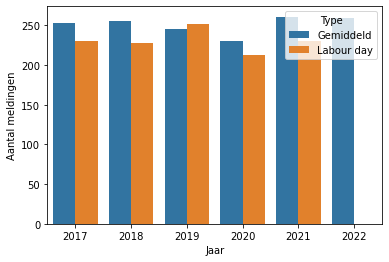

In [418]:
sns.barplot(data=j1_mean_join, x="Jaar", y="Aantal meldingen", hue="Type")
plt.show()

***
# Job story 2: Vergelijking van gemiddelde meldingen en meldingen op labour day per jaar

## Business understanding
In deze job story verkennen we of er op labour days verschil is in type misdaad ten opzichte van een gemiddelde dag per jaar.

## Data preparation
We maken gebruik van de in de algemene data preparartion voorbereide labourday_crime_df pandas.DataFrame

### Select data
Wat hebben we nodig om deze gemiddeldes te kunnen vergelijken?
De gemiddelde type misdaad op een normale dag per jaar.
De gemiddelde type misdaad op labour day per jaar.

In [455]:
# Om onafhankelijk aanpassingen te maken zijn nieuwe variabelen handig, vandaar een copy en een tag j1 (job story 1) aan het begin van het variabel
j2_labourday_crime_df = labourday_crime_df.copy()
j2_labourday_offense_df = labourday_offense_df.copy()

In [529]:
j2_labour_crime_count = j2_labourday_crime_df.groupby(["OFFENSE_CATEGORY_ID", "YEAR"], as_index=False).size()
j2_labour_crime_count["TYPE"] = "Labour day"
j2_labour_crime_count.set_index(["OFFENSE_CATEGORY_ID", "TYPE", "YEAR"])
j2_labour_crime_count

,OFFENSE_CATEGORY_ID,YEAR,size,TYPE
0,aggravated-assault,2017,5,Labour day
1,aggravated-assault,2018,10,Labour day
2,aggravated-assault,2019,9,Labour day
3,aggravated-assault,2020,9,Labour day
4,aggravated-assault,2021,4,Labour day
...,...,...,...,...
64,traffic-accident,2021,34,Labour day
65,white-collar-crime,2017,2,Labour day
66,white-collar-crime,2018,1,Labour day
67,white-collar-crime,2019,2,Labour day


In [530]:
j2_crime_count = crime_df.groupby(["OFFENSE_CATEGORY_ID", "REPORTED_DATE_NORMALIZED", "YEAR"], as_index=False).size()
j2_crime_count = j2_crime_count.groupby(["OFFENSE_CATEGORY_ID", "YEAR"], as_index=False).mean()
j2_crime_count["size"] = j2_crime_count["size"].round(0)
j2_crime_count["TYPE"] = "Algemeen"

j2_crime_count.reset_index()
j2_crime_count.set_index(["OFFENSE_CATEGORY_ID", "TYPE", "YEAR"])

j2_crime_count

,OFFENSE_CATEGORY_ID,YEAR,size,TYPE
0,aggravated-assault,2017,6.0,Algemeen
1,aggravated-assault,2018,7.0,Algemeen
2,aggravated-assault,2019,7.0,Algemeen
3,aggravated-assault,2020,8.0,Algemeen
4,aggravated-assault,2021,9.0,Algemeen
...,...,...,...,...
85,white-collar-crime,2018,4.0,Algemeen
86,white-collar-crime,2019,4.0,Algemeen
87,white-collar-crime,2020,3.0,Algemeen
88,white-collar-crime,2021,3.0,Algemeen


In [582]:
j2_joined = j2_labour_crime_count.append(j2_crime_count)


j2_joined.columns = ["Overtreding", "Jaar", "Gemiddled aantal overtredingen", "Type"]
j2_joined.index = pd.RangeIndex(len(j2_joined.index))
j2_joined

,Overtreding,Jaar,Gemiddled aantal overtredingen,Type
0,aggravated-assault,2017,5.0,Labour day
1,aggravated-assault,2018,10.0,Labour day
2,aggravated-assault,2019,9.0,Labour day
3,aggravated-assault,2020,9.0,Labour day
4,aggravated-assault,2021,4.0,Labour day
...,...,...,...,...
154,white-collar-crime,2018,4.0,Algemeen
155,white-collar-crime,2019,4.0,Algemeen
156,white-collar-crime,2020,3.0,Algemeen
157,white-collar-crime,2021,3.0,Algemeen


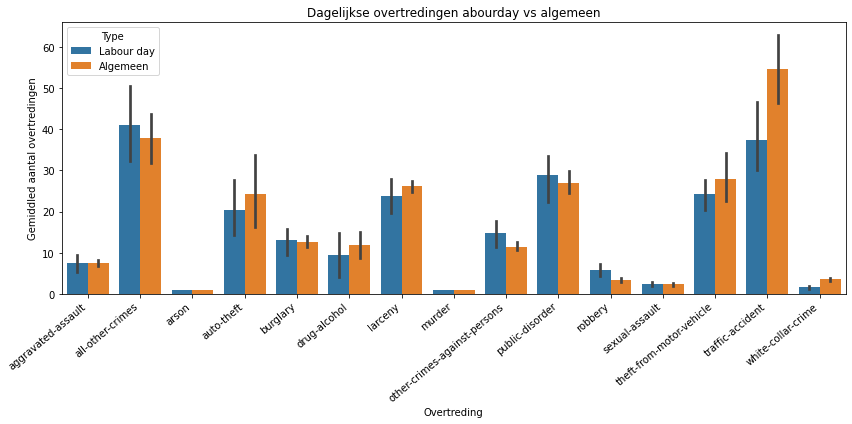

In [603]:
plt.figure(figsize=(12,6))
graph = sns.barplot(
    data=j2_joined,
    x="Overtreding",
    y="Gemiddled aantal overtredingen",
    hue="Type",
)
graph.set_xticklabels(graph.get_xticklabels(), rotation=40, ha="right")

plt.title("Dagelijkse overtredingen abourday vs algemeen")
plt.tight_layout()
plt.show()


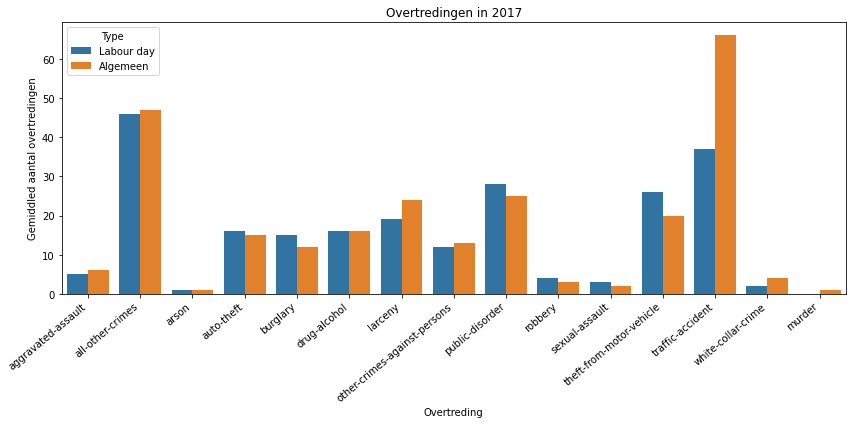

In [590]:
plt.figure(figsize=(12,6))

j2_joined_2017 = j2_joined.loc[j2_joined["Jaar"] == 2017]

graph = sns.barplot(
    data=j2_joined_2017,
    x="Overtreding",
    y="Gemiddled aantal overtredingen",
    hue="Type"
)
graph.set_xticklabels(graph.get_xticklabels(), rotation=40, ha="right")

plt.title("Overtredingen in 2017")
plt.tight_layout()
plt.show()

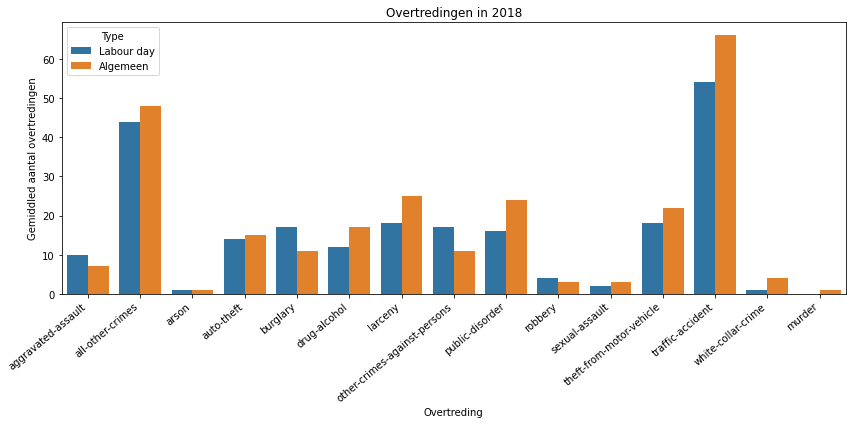

In [598]:
plt.figure(figsize=(12,6))

j2_joined_2018 = j2_joined.loc[j2_joined["Jaar"] == 2018]

graph = sns.barplot(
    data=j2_joined_2018,
    x="Overtreding",
    y="Gemiddled aantal overtredingen",
    hue="Type"
)
graph.set_xticklabels(graph.get_xticklabels(), rotation=40, ha="right")

plt.title("Overtredingen in 2018")
plt.tight_layout()
plt.show()

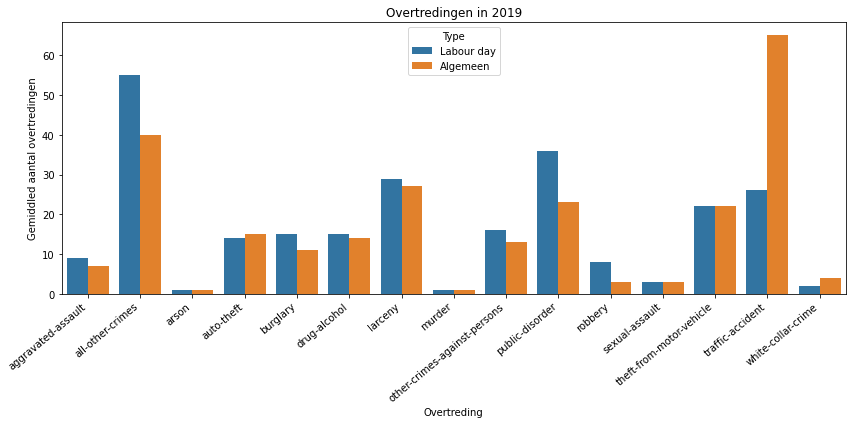

In [599]:
plt.figure(figsize=(12,6))

j2_joined_2019 = j2_joined.loc[j2_joined["Jaar"] == 2019]

graph = sns.barplot(
    data=j2_joined_2019,
    x="Overtreding",
    y="Gemiddled aantal overtredingen",
    hue="Type"
)
graph.set_xticklabels(graph.get_xticklabels(), rotation=40, ha="right")

plt.title("Overtredingen in 2019")
plt.tight_layout()
plt.show()

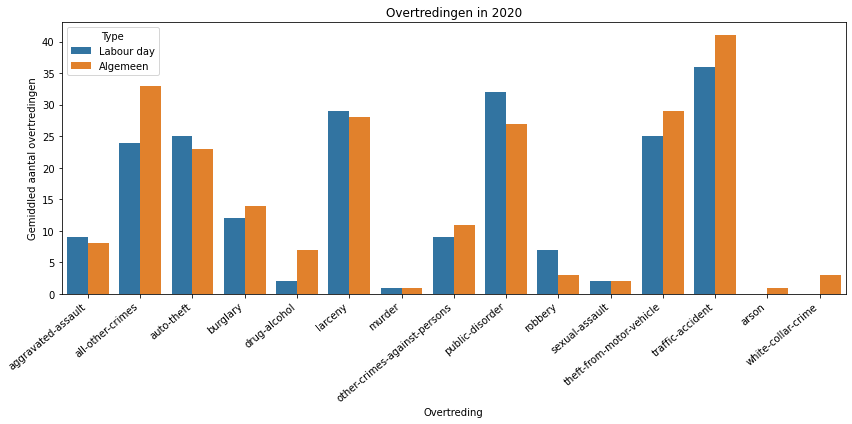

In [600]:
plt.figure(figsize=(12,6))

j2_joined_2020 = j2_joined.loc[j2_joined["Jaar"] == 2020]

graph = sns.barplot(
    data=j2_joined_2020,
    x="Overtreding",
    y="Gemiddled aantal overtredingen",
    hue="Type"
)
graph.set_xticklabels(graph.get_xticklabels(), rotation=40, ha="right")

plt.title("Overtredingen in 2020")
plt.tight_layout()
plt.show()

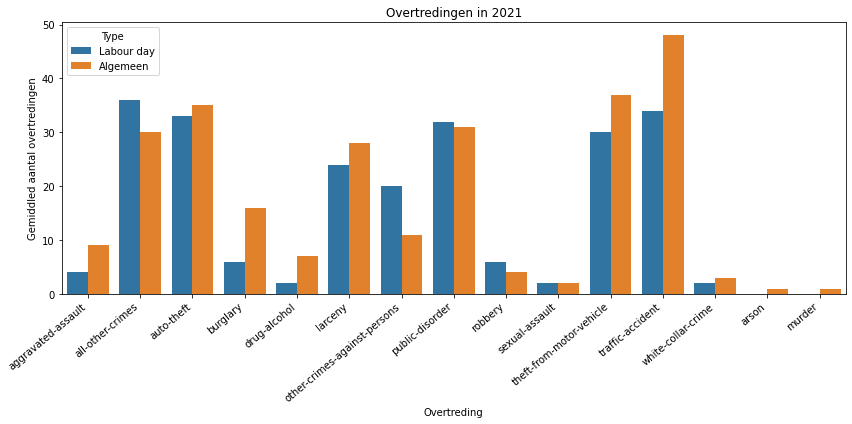

In [601]:
plt.figure(figsize=(12,6))

j2_joined_2021 = j2_joined.loc[j2_joined["Jaar"] == 2021]

graph = sns.barplot(
    data=j2_joined_2021,
    x="Overtreding",
    y="Gemiddled aantal overtredingen",
    hue="Type"
)
graph.set_xticklabels(graph.get_xticklabels(), rotation=40, ha="right")

plt.title("Overtredingen in 2021")
plt.tight_layout()
plt.show()

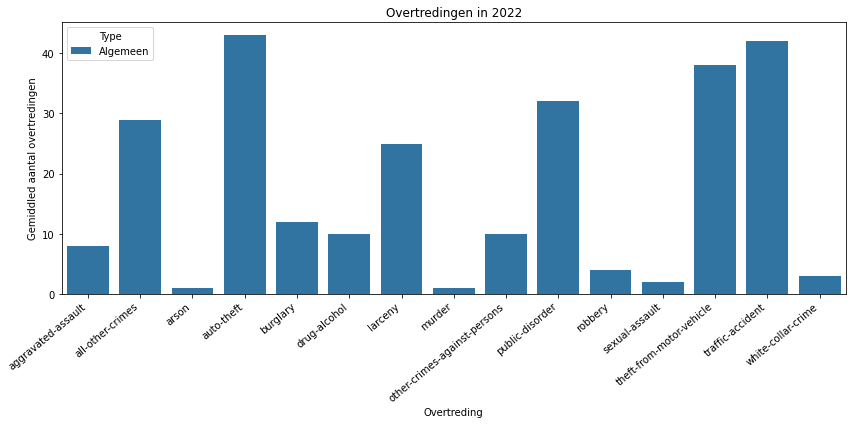

In [602]:
plt.figure(figsize=(12,6))

j2_joined_2022 = j2_joined.loc[j2_joined["Jaar"] == 2022]

graph = sns.barplot(
    data=j2_joined_2022,
    x="Overtreding",
    y="Gemiddled aantal overtredingen",
    hue="Type"
)
graph.set_xticklabels(graph.get_xticklabels(), rotation=40, ha="right")

plt.title("Overtredingen in 2022")
plt.tight_layout()
plt.show()

## Data preparation

### Select data

### Clean data

### Construct data

### Integrate data

### Format data

### Dataset description

## Modelling

### Select modelling techniques

### Generate test design

### Build model

### Assess Model

## Evaluation

### Evaluate results

### Review process

### Determine next steps

## Deployment

### Plan deployment

### Plan monitoring and maintenance

### Produce final report

### Review project